__Step 1: Data Loading and Exploration__

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


__Step 2: Data Preprocessing__

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [6]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [7]:
X = data.drop('Exited', axis=1)
y = data['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

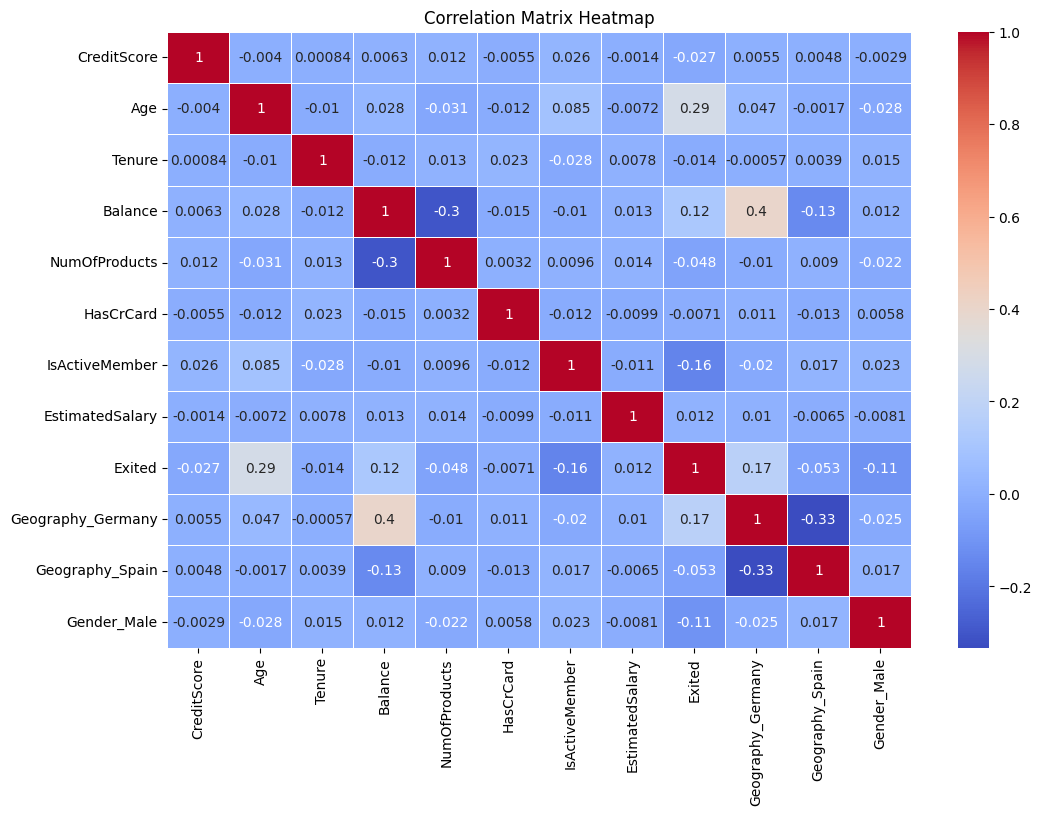

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

C:\Users\KRITIKA SINGH\AppData\Local\Temp\ipykernel_19668\4137490286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette='Set2')


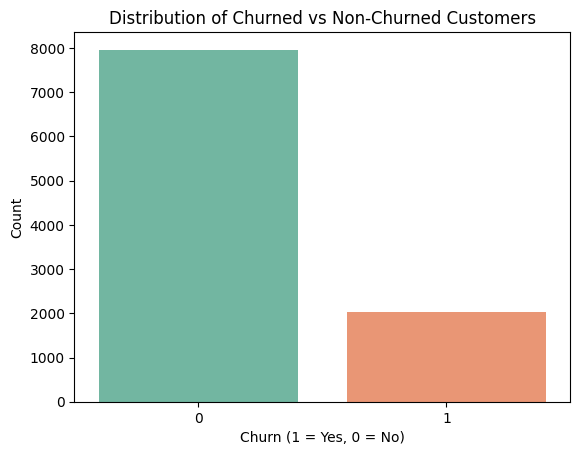

In [17]:
# Plot the distribution of churned vs non-churned customers
sns.countplot(x='Exited', data=data, palette='Set2')
plt.title('Distribution of Churned vs Non-Churned Customers')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

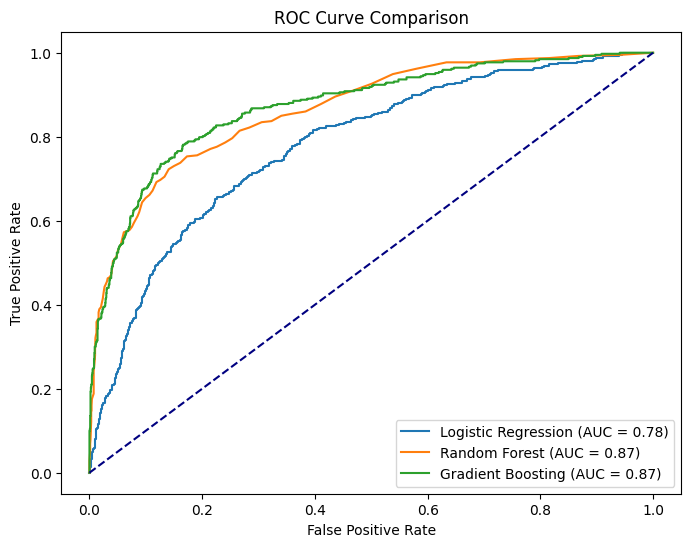

In [19]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Gradient Boosting ROC
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.predict_proba(X_test_scaled)[:,1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

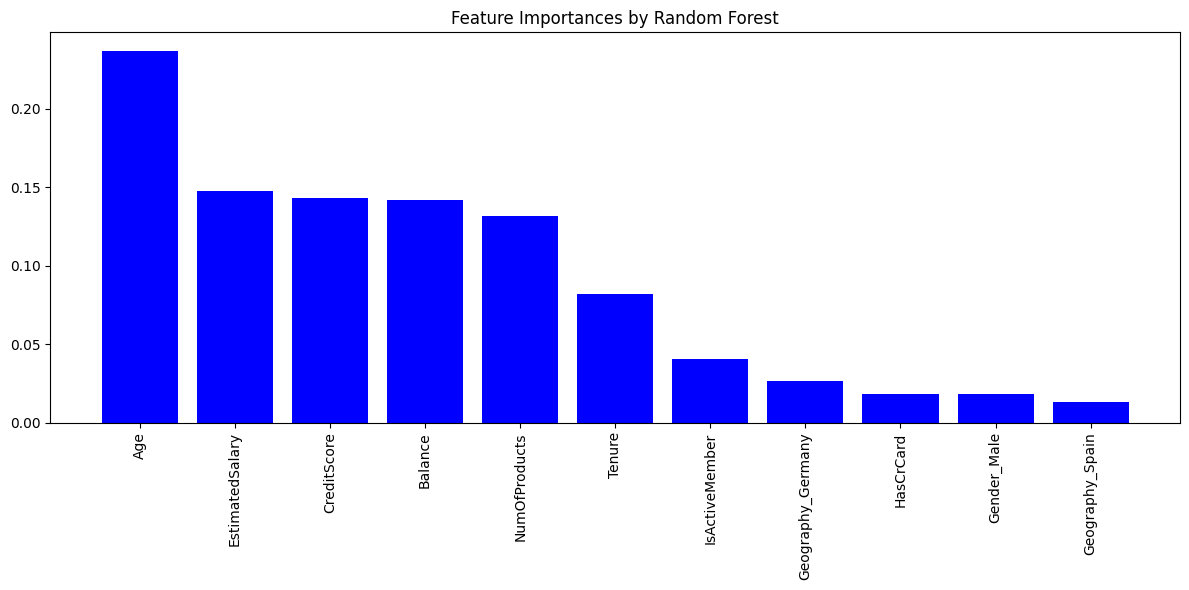

In [20]:
# Get feature importances from the Random Forest model
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances by Random Forest")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

__Step 3: Model Building__

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

* Logistic Regression

In [21]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

* Random Forest

In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

* Random Forest

In [23]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

__Step 4: Model Evaluation__

In [13]:
# Logistic Regression Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.811
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [14]:
# Random Forest Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8665
[[1550   57]
 [ 210  183]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [15]:
# Gradient Boosting Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8675
[[1543   64]
 [ 201  192]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

